## SVM

* 一種監督式的學習方法
* 希望可在一個由不同類別混合而成的資料集中，依據一些特徵，找到一個最佳的超平面(hyper plane)將不同類別的資料分開來。所謂最佳的超平面就是其距離兩個類別的邊界可以達到最大，而最靠近邊界的這些樣本點提供SVM最多的分類資訊，就叫做支持向量(Support Vector)。

* 使用統計風險最小化原則來估計一個分類的超平面(hyperplane)
  <br>=>目的找到一個決策邊界讓兩類之間的邊界最大化，使其可以區隔。


* 分隔超平面：將資料集分割開來的直線叫做分隔超平面。

* 超平面：如果資料集是N維的，那麼就需要N-1維的某物件來對資料進行分割。該物件叫做超平面，也就是分類的決策邊界。

* 間隔：一個點到分割面的距離，稱為點相對於分割面的距離。

* 支援向量：坐落在資料邊際的兩邊超平面上的點被稱為支援向量

![Alt text](https://cdn-images-1.medium.com/max/800/1*aqNgiEu0ZBeB-ojoWyryZA.png)

sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
<br>https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_hyperplane(clf, X, y, h=0.02, draw_sv=True,title='hyperplane'):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)

    markers = ['o', 's', '^']
    colors = ['b', 'r', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(X[y==label][:, 0], 
                    X[y==label][:, 1], 
                    c=colors[label], 
                    marker=markers[label])
    if draw_sv:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')

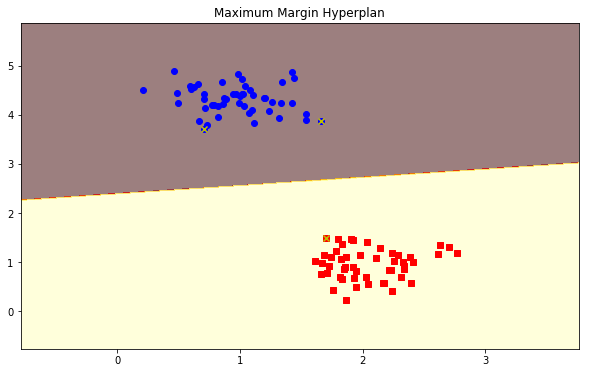

In [3]:
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, 
                  random_state=0, cluster_std=0.3)
clf = svm.SVC(C=1.0, kernel='linear')
clf.fit(X, y)
plt.figure(figsize=(10, 6))

plot_hyperplane(clf, X, y, h=0.01, title='Maximum Margin Hyperplan')

[[ 2.51654017  0.73102466]
 [ 0.25989683  4.61330933]
 [ 2.8130691   0.77365559]
 [-0.3148482   4.1335951 ]
 [ 0.13742771  3.16777298]
 [ 0.69794036  4.4288665 ]
 [-2.44487894  2.56762623]
 [-0.76736737  2.98792325]
 [ 2.59310333  1.22363313]
 [ 0.4688124   4.01359439]
 [ 1.55954253  4.40697366]
 [ 1.96050262  5.26569121]
 [ 2.42779747 -0.33133129]
 [ 2.20249345  5.47927434]
 [-2.12270787  2.25673143]
 [ 3.54931469  1.62249939]
 [-1.60566603  2.38709963]
 [ 0.32575305  2.92276125]
 [-1.5814973   4.28855644]
 [-2.41041068  2.95961432]
 [-2.04179874  1.13915974]
 [-1.55833027  1.98340746]
 [-1.01479879  1.62431743]
 [ 0.26604148  2.71915015]
 [ 1.19866542  1.74122504]
 [ 2.1567972   1.21925515]
 [ 1.43933466  1.32906301]
 [ 1.12314765  1.61832485]
 [-1.82224948  2.72637892]
 [-0.90947157  3.57668558]
 [ 1.09150494  5.46720613]
 [ 3.24586928  2.414375  ]
 [ 1.72437234  0.29969981]
 [ 2.17153334  4.13966072]
 [-1.89133002  2.93186559]
 [ 0.37961181  3.67346585]
 [ 0.893695    4.63226613]
 

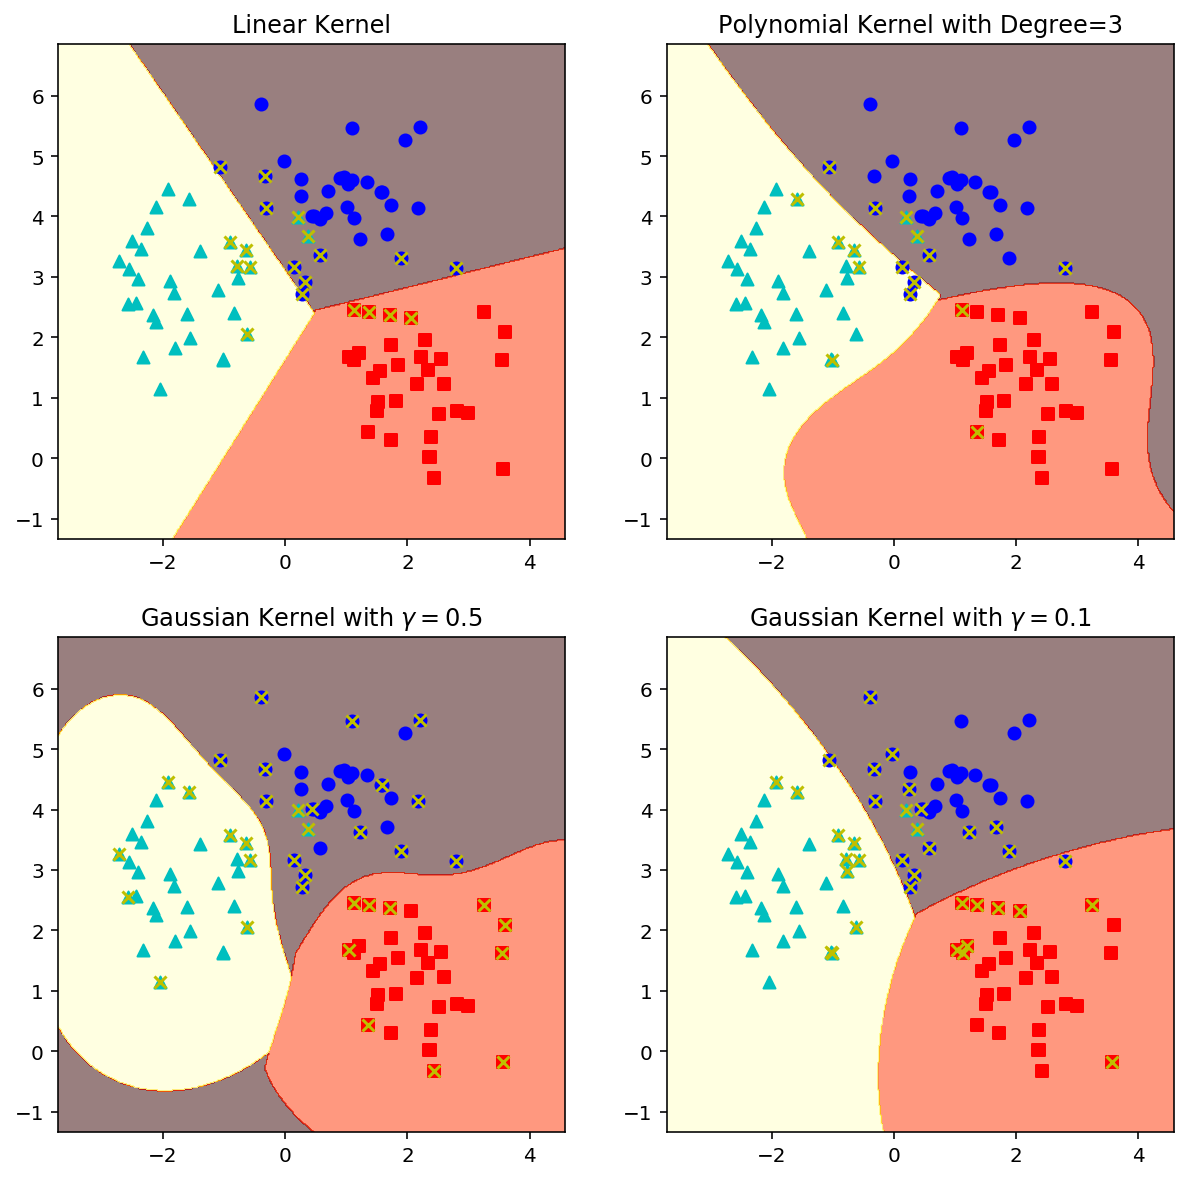

In [4]:
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=3, 
                  random_state=0, cluster_std=0.8)

print(X)
clf_linear = svm.SVC(C=1.0, kernel='linear')
clf_poly = svm.SVC(C=1.0, kernel='poly', degree=3)
clf_rbf = svm.SVC(C=1.0, kernel='rbf', gamma=0.5)
clf_rbf2 = svm.SVC(C=1.0, kernel='rbf', gamma=0.1)

plt.figure(figsize=(10, 10), dpi=144)

clfs = [clf_linear, clf_poly, clf_rbf, clf_rbf2]
titles = ['Linear Kernel', 
          'Polynomial Kernel with Degree=3', 
          'Gaussian Kernel with $\gamma=0.5$', 
          'Gaussian Kernel with $\gamma=0.1$']
for clf, i in zip(clfs, range(len(clfs))):
    clf.fit(X, y)
    plt.subplot(2, 2, i+1)
    plot_hyperplane(clf, X, y, title=titles[i])

#### Example1 Iris

In [5]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split as ts

#import our data
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
#split the data to  7:3
X_train,X_test,y_train,y_test = ts(X,y,test_size=0.3)

In [8]:
# select different type of kernel function and compare the score

# kernel = 'rbf'
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train,y_train)
score_rbf = clf_rbf.score(X_test,y_test)
print("The score of rbf is : %f"%score_rbf)

# kernel = 'linear'
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train,y_train)
score_linear = clf_linear.score(X_test,y_test)
print("The score of linear is : %f"%score_linear)

# kernel = 'poly'
clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(X_train,y_train)
score_poly = clf_poly.score(X_test,y_test)
print("The score of poly is : %f"%score_poly)

The score of rbf is : 1.000000
The score of linear is : 0.977778
The score of poly is : 0.955556


In [9]:
#### Example2 

In [10]:
from sklearn.datasets import load_breast_cancer

In [11]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print('data shape: {0}; no. positive: {1}; no. negative: {2}'.format(
    X.shape, y[y==1].shape[0], y[y==0].shape[0]))


data shape: (569, 30); no. positive: 357; no. negative: 212


In [12]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:

from sklearn.svm import SVC
 
clf = SVC(C=1.0, kernel='rbf', gamma=0.1)
#clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))


train score: 1.0; test score: 0.7192982456140351
